## MegaSena Storytelling

- **Aluno**: Felipe Morais da Silva
- **Matrícula**: 20170062872  

## Cenário

Imaginem que vocês foram selecionados para uma entrevista de emprego para o cargo de **Cientista de Dados** de uma grande empresa multinacional. A seleção será baseada em vários critérios, destacando as seguintes habilidades: resolução de problemas, criatividade, interpretação, escrita, organização, inovação, proeficiência em pandas, análise exploratória de dados e storytelling. Foi passado para vocês o dataset contendo todos os resultados da Megasena (*baseados.xlsx*), o **desafio** consiste em **interpretar** esses dados e **criar um significado** de entendimento conciso e claro.

## Requisitos

Para realizar a atividade, é necessário:

 - Utilizar apenas o dataset disponibilizado para essa atividade.
 - Criar um repositório no Github para a atividade.
 - Enviar apenas o link do respectivo repositório.
 - Criar um notebook descrevendo todos os códigos realizados. 
 - Todos os códigos precisam estar bem documentados.
 - Vocês precisam gerar no máximo 4 figuras.
 - Cada figura deve acompanhar uma célula com um texto descritivo, demonstrando todo o resultado encontrado. 
 - Seja inovador.

In [ ]:
# Instala as bibliotecas, caso ainda não tenham sido instaladas

!pip install pandas
!pip install matplotlib
!pip install xlrd

In [16]:
# Importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Atribuir o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'
# Carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Imprimir o nome das planilhas
print(excel.sheet_names)
# Carregar a planilha excel para um objeto dataframe
dados = excel.parse(0)
# Imprimir as cinco primeiras linhas do dataframe
dados.head()

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


In [28]:
dados.Dezena3.value_counts().head()

27    46
56    45
54    45
18    44
24    44
Name: Dezena3, dtype: int64

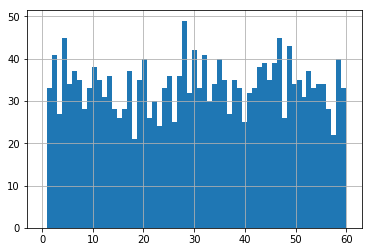

In [25]:
dados.Dezena1.hist(bins=61, range=(0,60))

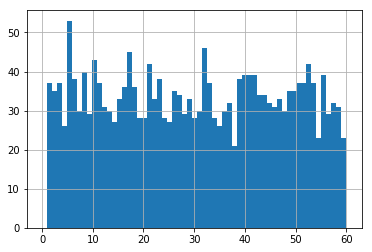

In [30]:
dados.Dezena2.hist(bins=61, range=(0,60))

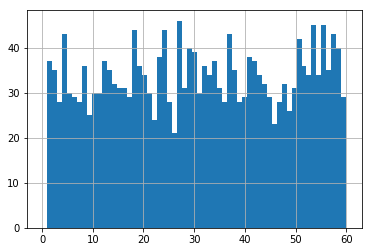

In [31]:
dados.Dezena3.hist(bins=61, range=(0,60))

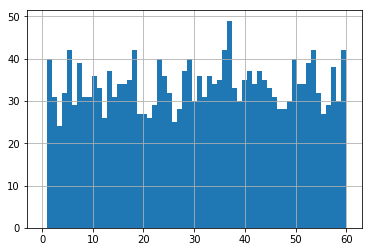

In [32]:
dados.Dezena4.hist(bins=61, range=(0,60))

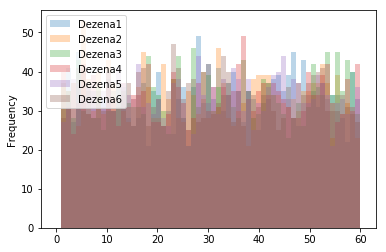

In [34]:
dezenas = dados[['Dezena1', 'Dezena2', 'Dezena3', 'Dezena4', 'Dezena5', 'Dezena6']]
dados.plot(kind='hist', bins=61, range=(0,60), alpha=0.3);

In [42]:
frequency_numbers = dados.iloc[:,2:8].unstack().value_counts()[0:6]
lucky_numbers     = y_axis.index


print (frequency_numbers)
print (lucky_numbers)

5     233
53    230
10    227
23    224
4     224
54    221
51    220
24    220
33    219
17    218
52    217
28    217
42    216
32    215
30    213
43    212
16    211
41    210
34    210
50    209
2     209
13    209
36    208
29    207
37    207
56    207
27    206
44    205
6     204
1     202
8     202
59    201
45    201
18    201
47    200
49    200
35    200
12    199
38    197
20    195
58    195
11    195
31    194
46    193
40    191
3     191
7     191
60    190
48    190
14    189
39    188
57    188
19    186
25    184
9     183
15    183
21    178
22    177
55    174
26    164
dtype: int64
Int64Index([5, 53, 10, 23, 4, 54], dtype='int64')
